
# **Mask checking**
## - cityscapes
## - bdd100 


In [1]:
import cv2
import numpy as np
import os, glob
import time
import csv

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
cityscapes = False
bdd100 = False


# Dataset chosing
cityscapes = True
#bdd100 = True

### **Creating of data path list**

In [4]:
if cityscapes:
    foreground_directory = '/home/admin1/Programming/HIWI_MRT/cityscapes_data/foreground/'
    save_directory = '/home/admin1/Programming/HIWI_MRT/image_data_augmentation/mask_checking/cityscapes_data/overlay_mask/'
    maskFG_paths = glob.glob(os.path.join(foreground_directory, 'mask','*_gtFine_labelIds.png'))
if bdd100:
    foreground_directory = '/home/admin1/Programming/HIWI_MRT/bdd100_data/foreground/'
    save_directory = '/home/admin1/Programming/HIWI_MRT/image_data_augmentation/mask_checking/bdd100_data/overlay_mask/'
    maskFG_paths = glob.glob(os.path.join(foreground_directory, 'mask','*.png'))

### **Basic image edit functions**

In [5]:
def data_name_choser(maskFG_path): 
    if cityscapes:
        FGname = '_'.join(maskFG_path.split('/')[-1].split('_')[:-2])
    if bdd100:
        FGname = '_'.join(maskFG_path.split('/')[-1].split('_')[:-2])
    
    return FGname 

In [6]:
def data_loader(FGname):
    if cityscapes:
        imgFG_path = os.path.join(foreground_directory, 'img',FGname + '_leftImg8bit.png')
    if bdd100:
        imgFG_path = os.path.join(foreground_directory, 'img',FGname + '.jpg')
    FGimg = cv2.imread(imgFG_path); FGimg = cv2.cvtColor(FGimg, cv2.COLOR_BGR2RGB)
    FGmask = cv2.imread(maskFG_path); FGmask = cv2.cvtColor(FGmask, cv2.COLOR_BGR2RGB)
    
    return FGimg, FGmask    

In [7]:
def overlay(colored_mask,output_img,person_value, height,width,alpha):  
    # Foreground mask preprocessing
    colored_FGmask = np.where(colored_mask==person_value, 255, 0).astype(np.uint8)
    new_FGmask = np.ones((height,width,3), np.uint8)
    new_FGmask[:,:,1] = colored_FGmask[:,:,1]

    # Background mask preprocessing
    colored_BGmask = cv2.bitwise_not(colored_FGmask)
    new_BGmask = np.ones((height,width,3), np.uint8)
    new_BGmask[:,:,0] = colored_BGmask[:,:,0]

    # Applied mask
    overlay_mask = cv2.add(new_FGmask, new_BGmask)

    # apply the overlay
    cv2.addWeighted(overlay_mask, alpha, output_img, 1 - alpha, 0, output_img)
    return output_img, colored_FGmask

In [8]:
def contours_drawing(colored_FGmask,output_img):
    gray_mask = cv2.cvtColor(colored_FGmask, cv2.COLOR_RGB2GRAY)
    ret,mask_thresh = cv2.threshold(gray_mask,128,255,0)
    obj_contours, obj_hierarchy = cv2.findContours(mask_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    output_img = cv2.drawContours(output_img, obj_contours, contourIdx=-1, color=(0,255,0),thickness=1)
    return output_img

In [9]:
def data_saver(data_name, overlay_mask, id_data):
    overlay_mask_path = os.path.join(save_directory, data_name + '_' + str(id_data) +'.png')
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_RGB2BGR)
    cv2.imwrite(overlay_mask_path, overlay_mask)

## **Main function**

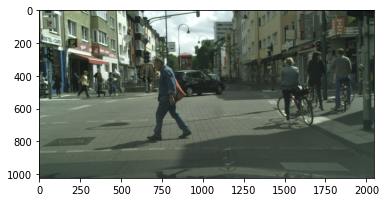

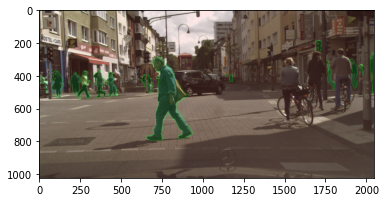

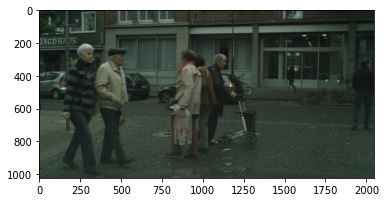

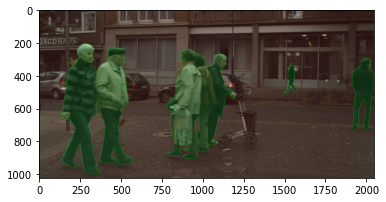

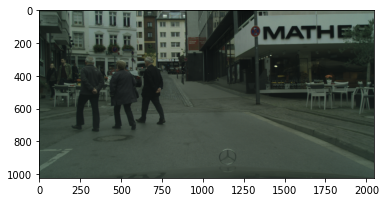

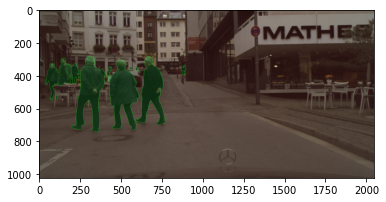

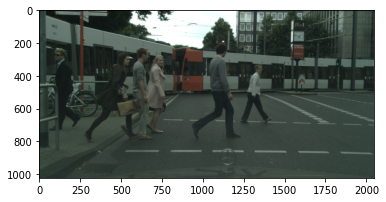

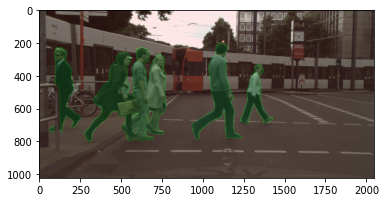

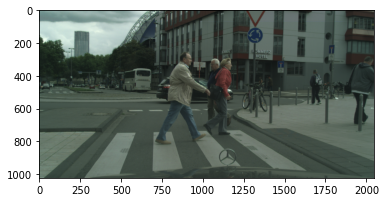

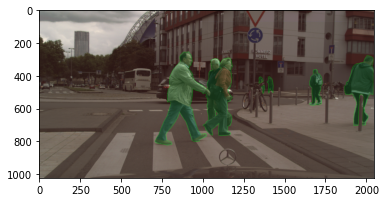

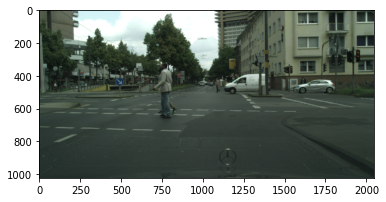

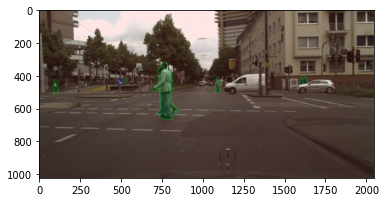

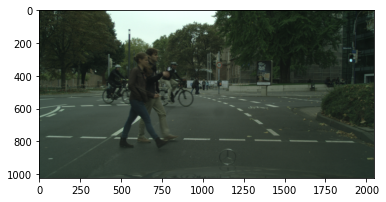

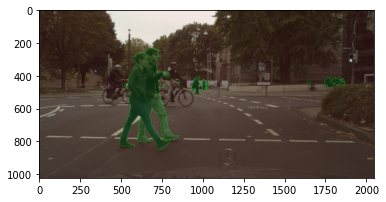

----------------- 10.13 seconds ----------------


In [10]:
# MAIN
if __name__ == '__main__':
    start_time = time.time()

    if cityscapes:
        person_value = 24
    if bdd100:
        person_value = 11
    id_data = 1
    for maskFG_path in maskFG_paths: 
        # Data name chosing
        FGname = data_name_choser(maskFG_path)
        
        # Data loading
        FGimg, FGmask = data_loader(FGname)
        FGheight = FGmask.shape[0]; FGwidth = FGmask.shape[1]
        
        colored_mask = FGmask.copy()
        output_img = FGimg.copy()
        
        # Img with mask overlaing
        alpha = 0.1
        output_img, colored_FGmask = overlay(colored_mask,output_img, person_value, FGheight,FGwidth,alpha)
        
        # Contours drawing
        output_img = contours_drawing(colored_FGmask,output_img)
        
        # Data saving 
        data_saver(FGname, output_img, id_data)
        
        
        plt.imshow(FGimg)
        plt.show()
        plt.imshow(output_img)
        plt.show()
        
        id_data += 1
        
    print("----------------- %s seconds ----------------" % ( round((time.time() - start_time), 2) ))